In [1]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Apr 10 17:37 kaggle.json


In [2]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Apr 10 17:37 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 66 Apr 10 17:47 kaggle.json


In [5]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 72.0MB/s]
100% 270M/271M [00:04<00:00, 68.3MB/s]
100% 271M/271M [00:04<00:00, 58.9MB/s]
 99% 536M/543M [00:03<00:00, 161MB/s]
100% 543M/543M [00:04<00:00, 141MB/s]


In [6]:
from zipfile import ZipFile
print("uncompressing zip file")

filename = "train.zip"

with ZipFile(filename, 'r') as zip:
    zip.extractall()
  
print("done")

uncompressing zip file
done


In [7]:
from zipfile import ZipFile
print("uncompressing zip file")

filename = "test1.zip"

with ZipFile(filename, 'r') as zip:
    zip.extractall()
  
print("done")

uncompressing zip file
done


In [35]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import random
import os


IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

In [0]:
#preparing training data

train_data_dir  = os.listdir("train")
categories = []
for filename in train_data_dir:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [0]:
df = pd.DataFrame({
    'filename': train_data_dir,
    'category': categories
})

In [39]:
df.head()

,category,filename
0,1,dog.6294.jpg
1,1,dog.4842.jpg
2,1,dog.6901.jpg
3,0,cat.8685.jpg
4,1,dog.11637.jpg


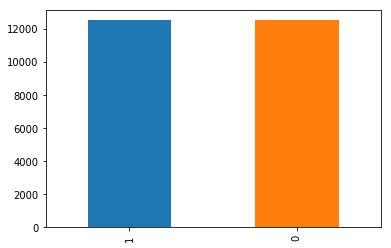

In [40]:
df['category'].value_counts().plot.bar()



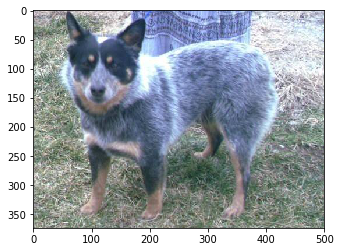

In [41]:
# Sample image

sample = random.choice(train_data_dir)
image = load_img("train/"+sample)
plt.imshow(image)

In [0]:
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense ,BatchNormalization
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint

In [0]:
TRAINING_LOGS_FILE = "best_dog_cat_classifier_training_logs.csv"
MODEL_SUMMARY_FILE = "best_dog_cat_classifier_model_summary.txt"
MODEL_FILE = "best_dog_cat_classifier_model.h5"
Checkpoint_file = "checkpoint_best_weights.hdf5"

In [44]:
# Model 
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='dog_architecture.png', show_shapes=True, show_layer_names=True)

In [0]:
with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))


In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=10)

#We will reduce the learning rate when then accuracy not increase for 2 step
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction, 
             CSVLogger(TRAINING_LOGS_FILE, append=False,separator=";"),
            ModelCheckpoint(Checkpoint_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')]



In [0]:
train_df, validate_df = train_test_split(df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

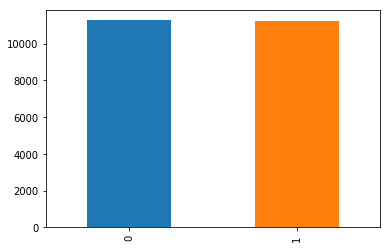

In [49]:
train_df['category'].value_counts().plot.bar()

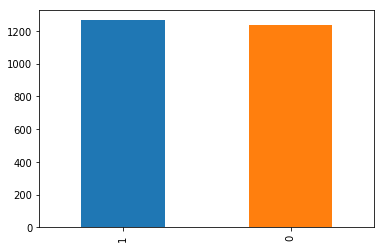

In [50]:
validate_df['category'].value_counts().plot.bar()


In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32


In [0]:
train_df['category'] = train_df['category'].astype(str)

In [53]:
#Traning Generator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 22500 images belonging to 2 classes.


In [0]:
validate_df['category'] = validate_df['category'].astype(str)

In [55]:
#Validation Data genrator

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 2500 images belonging to 2 classes.


In [58]:
epochs=20
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks,
    verbose=1
)

model.save("dog_cat_classifier_best_model.h5")

Epoch 1/20
703/703 [==============================] - 415s 591ms/step - loss: 0.6865 - acc: 0.6567 - val_loss: 0.9650 - val_acc: 0.6353

Epoch 00001: val_acc improved from -inf to 0.63533, saving model to checkpoint_best_weights.hdf5
Epoch 2/20
703/703 [==============================] - 412s 586ms/step - loss: 0.6126 - acc: 0.7021 - val_loss: 0.7938 - val_acc: 0.6548

Epoch 00002: val_acc improved from 0.63533 to 0.65478, saving model to checkpoint_best_weights.hdf5
Epoch 3/20
703/703 [==============================] - 413s 588ms/step - loss: 0.5480 - acc: 0.7438 - val_loss: 0.6904 - val_acc: 0.7115

Epoch 00003: val_acc improved from 0.65478 to 0.71154, saving model to checkpoint_best_weights.hdf5
Epoch 4/20
703/703 [==============================] - 410s 583ms/step - loss: 0.4863 - acc: 0.7813 - val_loss: 0.9163 - val_acc: 0.5932

Epoch 00004: val_acc did not improve from 0.71154
Epoch 5/20
703/703 [==============================] - 409s 581ms/step - loss: 0.4426 - acc: 0.8051 - val_

In [0]:
import matplotlib.image as mpimg
from keras.preprocessing import image

In [93]:
path = '1.jpg'
imag = image.load_img(path,target_size = (224,224))
imag = image.img_to_array(imag)
imag = np.expand_dims(imag,axis=0)
imag = imag/255
prob = model.predict(imag)
prob

array([[0.9999994]], dtype=float32)

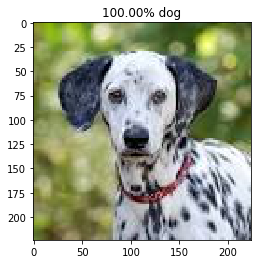

In [94]:
if prob > 0.5:
    plt.title("%.2f" % (prob[0]*100) + "% dog")
else:
    plt.title("%.2f" % ((1-prob[0])*100) + "% cat")
  
plt.imshow(image.load_img(path,target_size=(224,224)))

In [0]:
test_data_dir = os.listdir("test1")
sample = random.choice(test_data_dir)
path = "test1/"+sample
imag = image.load_img(path,target_size = (224,224))
imag = image.img_to_array(imag)
imag = np.expand_dims(imag,axis=0)
imag = imag/255
prob = model.predict(imag)
if prob > 0.5:
    plt.title("%.2f" % (prob[0]*100) + "% dog")
else:
    plt.title("%.2f" % ((1-prob[0])*100) + "% cat")
  
plt.imshow(image.load_img(path,target_size=(224,224)))

    